<a href="https://colab.research.google.com/github/11kartheek/clip-sam/blob/main/game.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip -q install torch torchvision transformers


In [2]:
!pip -q install datasets[vision]
!pip -q install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.3/527.3 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 7.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 17.0.0 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 150.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 90.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.7/318.7 kB 19.0

In [3]:
!pip -q install open_clip_torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 31.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.0/43.0 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 47.1 MB/s eta 0:00:00


In [6]:
from datasets import load_dataset

In [9]:
import open_clip
import torch
import gradio as gr
from PIL import Image
from datasets import load_dataset

# Load the model and tokenizer
model, _, preprocess = open_clip.create_model_and_transforms('ViT-B-32', pretrained='openai')
tokenizer = open_clip.get_tokenizer('ViT-B-32')

# Load the fruits dataset
dataset = load_dataset("VinayHajare/Fruits-30")





Resolving data files:   0%|          | 0/827 [00:00<?, ?it/s]

In [15]:
def search_images(query):
    # Tokenize the query
    text = tokenizer([query])

    similarities = []
    images = []

    # Loop through all images in the dataset
    for i in range(len(dataset['train'])):
        # Get the image from the dataset
        image = dataset['train'][i]['image']

        # Preprocess the image
        image_input = preprocess(image).unsqueeze(0)

        # Perform inference
        with torch.no_grad():
            image_features = model.encode_image(image_input)
            text_features = model.encode_text(text)

            # Normalize features
            image_features /= image_features.norm(dim=-1, keepdim=True)
            text_features /= text_features.norm(dim=-1, keepdim=True)

            # Calculate similarity between text and image
            similarity = (image_features @ text_features.T).squeeze().item()

        similarities.append(similarity)
        images.append(image)

    # Get the indices of the top 2 most similar images
    top_indices = sorted(range(len(similarities)), key=lambda i: similarities[i], reverse=True)[:2]

    # Return the top 2 images
    return [images[top_indices[0]], images[top_indices[1]]]


In [17]:

# # Create the Gradio interface
# iface = gr.Interface(
#     fn=search_images,
#     inputs=gr.Textbox(label="Search Query"),
#     outputs=[gr.Image(label="Top Image 1"), gr.Image(label="Top Image 2")]
# )

# iface.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://49fd1cf38948a5cf42.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


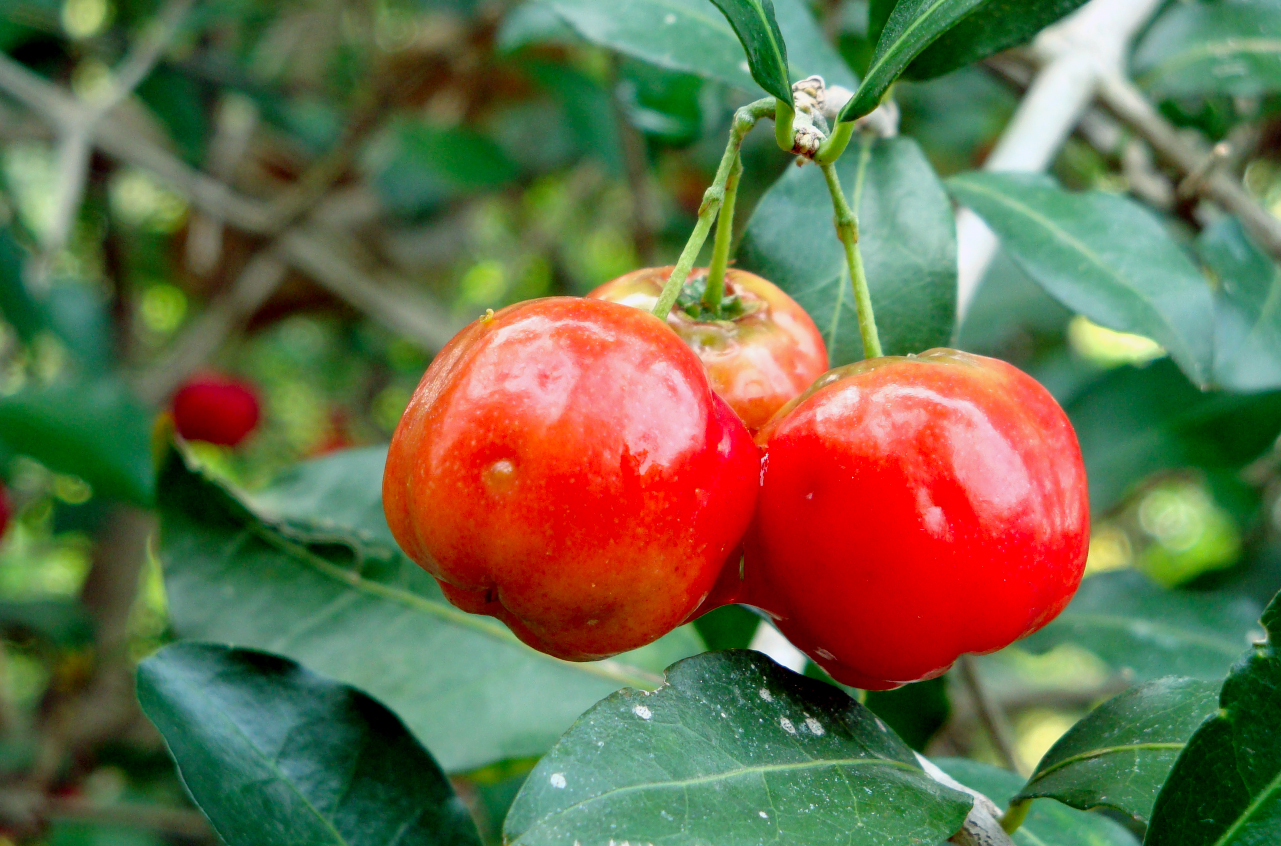

In [14]:
dataset["train"][1]['image']

In [28]:
from collections import OrderedDict


FRUITS30_CLASSES = OrderedDict(
    {
           "0" : "acerolas",
           "1" : "apples",
           "2" : "apricots",
           "3" : "avocados",
           "4" : "bananas",
           "5" : "blackberries",
           "6" : "blueberries",
           "7" : "cantaloupes",
           "8" : "cherries",
           "9" : "coconuts",
           "10" : "figs",
           "11" : "grapefruits",
           "12" : "grapes",
           "13" : "guava",
           "14" : "kiwifruit",
           "15" : "lemons",
           "16" : "limes",
           "17" : "mangos",
           "18" : "olives",
           "19" : "oranges",
           "20" : "passionfruit",
           "21" : "peaches",
           "22" : "pears",
           "23" : "pineapples",
           "24" : "plums",
           "25" : "pomegranates",
           "26" : "raspberries",
           "27" : "strawberries",
           "28" : "tomatoes",
           "29" : "watermelons"
    }
)

In [33]:
# Prepare the labels list
# labels = dataset['train']['label']
# images = dataset['train']['image']
import random
# Function to pick three random sets and shuffle labels
def prepare_game():
    # Pick 3 random indices
    indices = random.sample(range(len(dataset['train'])), 3)

    # Get images and their corresponding labels
    selected_images = [dataset['train'][i]['image'] for i in indices]
    correct_labels = [FRUITS30_CLASSES[str(dataset['train'][i]['label'])] for i in indices]

    # Shuffle the labels
    shuffled_labels = random.sample(correct_labels, len(correct_labels))

    return selected_images, correct_labels, shuffled_labels



In [74]:
selected_images, correct_labels, shuffled_labels = prepare_game()

In [75]:
selected_images, correct_labels, shuffled_labels

([<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=597x600>,
  <PIL.Image.Image image mode=RGB size=2668x1778>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=640x509>],
 ['pomegranates', 'kiwifruit', 'olives'],
 ['kiwifruit', 'pomegranates', 'olives'])

In [ ]:
model, _, preprocess = open_clip.create_model_and_transforms('ViT-B-32', pretrained='laion2b_s34b_b79k')
model.eval()  # model in train mode by default, impacts some models with BatchNorm or stochastic depth active
tokenizer = open_clip.get_tokenizer('ViT-B-32')


In [78]:

image = preprocess(selected_images[0]).unsqueeze(0)
text = tokenizer(correct_labels)

with torch.no_grad(), torch.cuda.amp.autocast():
    image_features = model.encode_image(image)
    text_features = model.encode_text(text)
    image_features /= image_features.norm(dim=-1, keepdim=True)
    text_features /= text_features.norm(dim=-1, keepdim=True)

    text_probs = (100.0 * image_features @ text_features.T).softmax(dim=-1)

print("Label probs:", text_probs)  # prints: [[1., 0., 0.]]

Label probs: tensor([[1.0000e+00, 1.7719e-09, 2.2707e-08]])


In [ ]:
def match_images(label1, label2, label3, shuffled_labels):
    correct_labels = shuffled_labels
    selected_labels = [label1, label2, label3]
    correct_matches = sum([1 for i in range(3) if correct_labels[i] == selected_labels[i]])

    return f"You got {correct_matches} out of 3 correct!"


In [45]:
def match_images(selected_labels, correct_labels):
    correct_matches = sum([1 for i in range(3) if correct_labels[i] == selected_labels[i]])
    return f"You got {correct_matches} out of 3 correct!"

In [58]:
# def match_images(label1, label2, label3, shuffled_labels):
#     correct_labels = shuffled_labels
#     selected_labels = [label1, label2, label3]
#     correct_matches = sum([1 for i in range(3) if correct_labels[i] == selected_labels[i]])

#     return f"You got {correct_matches} out of 3 correct!"

# # Create Gradio app
# def game_interface():
#     selected_images, correct_labels, shuffled_labels = prepare_game()

#     # Define the Gradio Interface
#     iface = gr.Interface(
#         fn=lambda i1,label1,i2, label2,i3, label3: match_images(label1, label2, label3, correct_labels),
#         inputs=[
#             gr.Image(value=selected_images[0], label="Image 1"),
#             gr.Dropdown(choices=shuffled_labels, label="Label for Image 1"),
#             gr.Image(value=selected_images[1], label="Image 2"),
#             gr.Dropdown(choices=shuffled_labels, label="Label for Image 2"),
#             gr.Image(value=selected_images[2], label="Image 3"),
#             gr.Dropdown(choices=shuffled_labels, label="Label for Image 3"),
#         ],
#         outputs=gr.Textbox(label="Result")
#     )

#     iface.launch()

# # Run the game
# game_interface()

In [47]:
display_images, shuffled_labels, correct_labels = get_game_data()

In [48]:
evaluate_game(shuffled_labels[0], shuffled_labels[1], shuffled_labels[2], correct_labels)

'You got 1 out of 3 correct!'

In [51]:
def get_game_data():
    selected_images, correct_labels, shuffled_labels = prepare_game()

    # Convert PIL images to displayable format for Gradio
    display_images = [img.convert("RGB") for img in selected_images]

    return display_images, shuffled_labels, correct_labels

def evaluate_game(selected_label1, selected_label2, selected_label3):
    selected_labels = [selected_label1, selected_label2, selected_label3]
    return match_images(selected_labels, correct_labels)


In [57]:
def get_game_data():
    selected_images, correct_labels, shuffled_labels = prepare_game()

    # Convert PIL images to displayable format for Gradio
    display_images = [img.convert("RGB") for img in selected_images]

    return display_images, shuffled_labels, correct_labels

def evaluate_game(selected_label1, selected_label2, selected_label3, correct_labels):
    selected_labels = [selected_label1, selected_label2, selected_label3]
    return match_images(selected_labels, correct_labels)


/usr/local/lib/python3.10/dist-packages/gradio/utils.py:1002: UserWarning: Expected 3 arguments for function <function game_interface.<locals>.<lambda> at 0x7a07e57a11b0>, received 6.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/utils.py:1010: UserWarning: Expected maximum 3 arguments for function <function game_interface.<locals>.<lambda> at 0x7a07e57a11b0>, received 6.
  warnings.warn(


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://1d2764f70faa83386d.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [68]:
import io
def get_game_data():
    selected_images, correct_labels, shuffled_labels = prepare_game()

    # Convert PIL images to displayable format for Gradio
    display_images = [img.convert("RGB") for img in selected_images]

    return display_images, shuffled_labels, correct_labels

def evaluate_game(selected_label1, selected_label2, selected_label3, correct_labels):
    selected_labels = [selected_label1, selected_label2, selected_label3]
    return match_images(selected_labels, correct_labels)

def refresh_game():
    display_images, shuffled_labels, correct_labels = get_game_data()
    return display_images, shuffled_labels, correct_labels
initial_correct_labels = ["apples","bananas","gauva"]
inital_labels = ["apples","bananas","gauva"]


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://00eea55d52f26fcf43.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


/usr/local/lib/python3.10/dist-packages/gradio/components/dropdown.py:188: UserWarning: The value passed into gr.Dropdown() is not in the list of choices. Please update the list of choices to include: ['grapefruits', 'avocados', 'figs'] or set allow_custom_value=True.
  warnings.warn(


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7877 <> https://00eea55d52f26fcf43.gradio.live


In [73]:
def create_interface():
    # Store current correct labels in a mutable container
    current_correct_labels = []

    def update_images_and_labels():
        nonlocal current_correct_labels
        images, shuffled_labels, correct_labels = get_game_data()
        current_correct_labels = correct_labels
        return images[0], images[1], images[2], gr.update(choices=shuffled_labels), gr.update(choices=shuffled_labels),gr.update(choices=shuffled_labels)

    def on_submit(label1, label2, label3):
        selected_labels = [label1, label2, label3]
        return match_images(selected_labels, current_correct_labels)

    with gr.Blocks() as demo:
        # Create components
        with gr.Row():
          img1 = gr.Image(type="pil", label="Image 1")
          img2 = gr.Image(type="pil", label="Image 2")
          img3 = gr.Image(type="pil", label="Image 3")
        with gr.Row():
          label1 = gr.Dropdown(choices=[], label="Label for Image 1")
          label2 = gr.Dropdown(choices=[], label="Label for Image 2")
          label3 = gr.Dropdown(choices=[], label="Label for Image 3")

        submit_btn = gr.Button("Submit")
        refresh_btn = gr.Button("Refresh")

        result = gr.Textbox(label="Result")

        # Update images, labels, and correct labels on refresh button click
        refresh_btn.click(
            fn=update_images_and_labels,
            outputs=[img1, img2, img3, label1, label2, label3]
        )


        # Evaluate user input on submit button click
        submit_btn.click(
            fn=on_submit,
            inputs=[label1, label2, label3],
            outputs=result
        )

    demo.launch()

# Run the game
create_interface()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://00a5d9bf06346a1c8c.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
